In [7]:

import pandas as pd #datqa frame operators
from pandas.plotting import scatter_matrix
import numpy as np #arrays and math functions
from scipy.stats import uniform #for training and test splits
import statsmodels.api as sm #statiscal models including regression
import statsmodels.formula.api as smf # R-life model specification
from sklearn.tree import DecisionTreeRegressor  #machine learning tree
from sklearn.ensemble import RandomForestRegressor #ensemble method
import seaborn as sns
import matplotlib.pyplot as plt #colored legend patches + 2D plotting
import matplotlib.patches as mpatches
from scipy.stats import uniform  # for training-and-test split
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
#from plotly import tools
import random #mixing up the data for train\test
import os
os.chdir('C:\\Users\\17574\\Desktop\\ist718+Big+Data\\Homework_1\\') 
os.getcwd()
"""--------------------------------------------------------------------------
---------------------------------OBTAIN--------------------------------------
Data from 4 sources:
a) provided base coach data: b) 
#=> https://www.ncaa.org/about/resources/research/shared-ncaa-research-data
    downloaded division 1, 2: GSR, FSR
c) https://www.distancesfrom.com  : for lat/long
d) stadium capacity: 
e) win\loss statistics
--------------------------------------------------------------------------"""
                #header=None, delim_whitespace = True, skipinitialspace=False, \
mydata = pd.read_csv("hw1_data.csv",
                names = ['id_school', 'id_coach','id_conference','taem1','conference', 'coachname', \
                         'pay', 'totalpay','bonus','bonuspaid','assistantpay','buyout',\
                         'annualdonations','lat','long','division','fsr','gsr', 'team2','stadium', \
                         'city','state','capacity','built','dateaddition','additionyn','win','loss'])
#df_output = pd.DataFrame(mydata)
#df_output.to_csv("todelete.csv", index=True)
print(mydata.dtypes)
print(mydata.head(1))
mydata['idx'] = range(len(mydata)) #for use as an index  
mydata = mydata.set_index(['idx'])
mydf0 = mydata
mydf0.describe()

id_school            int64
id_coach             int64
id_conference       object
taem1               object
conference          object
coachname          float64
pay                float64
totalpay           float64
bonus              float64
bonuspaid            int64
assistantpay       float64
buyout             float64
annualdonations    float64
lat                float64
long                 int64
division           float64
fsr                float64
gsr                 object
team2               object
stadium             object
city                object
state                int64
capacity             int64
built                int64
dateaddition         int64
additionyn           int64
win                  int64
loss                 int64
dtype: object
        id_school  id_coach id_conference     taem1    conference  coachname  \
128328          1         8     Air Force  Mt. West  Troy Calhoun   885000.0   

             pay  totalpay  bonus  bonuspaid  ...           team2  \


,id_school,id_coach,coachname,pay,totalpay,bonus,bonuspaid,assistantpay,buyout,annualdonations,...,long,division,fsr,state,capacity,built,dateaddition,additionyn,win,loss
count,130.000000,130.000000,1.250000e+02,1.250000e+02,1.070000e+02,8.800000e+01,130.0,1.070000e+02,1.0,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,65.500000,5.923077,2.410301e+06,2.417061e+06,8.741782e+05,1.495243e+05,0.0,8.119107e+06,0.0,36.768831,...,1.015385,60.746154,76.042308,50112.830769,1957.607692,1572.107692,0.784615,590.715385,466.053846,21.046154
std,37.671829,3.205169,1.881377e+06,1.885752e+06,6.346974e+05,2.387579e+05,0.0,1.046135e+07,NaN,4.923720,...,0.123553,13.209159,11.904640,24398.184968,28.925860,826.916691,0.412679,185.716890,138.756734,12.068192
min,1.000000,1.000000,3.900000e+05,3.900000e+05,5.000000e+04,0.000000e+00,0.0,0.000000e+00,0.0,21.296900,...,1.000000,0.000000,0.000000,6000.000000,1913.000000,0.000000,0.000000,32.000000,56.000000,1.000000
25%,33.250000,3.000000,8.015040e+05,8.058500e+05,3.950000e+05,1.937500e+04,0.0,1.200000e+06,0.0,33.457100,...,1.000000,54.250000,71.000000,30235.750000,1929.000000,1985.500000,1.000000,524.000000,413.500000,10.000000
50%,65.500000,6.000000,1.831580e+06,1.900008e+06,7.750000e+05,6.375000e+04,0.0,4.000000e+06,0.0,36.549900,...,1.000000,62.300000,77.000000,46846.000000,1961.000000,2003.000000,1.000000,599.500000,486.000000,22.500000
75%,97.750000,9.000000,3.605000e+06,3.617500e+06,1.150000e+06,1.800000e+05,0.0,1.106500e+07,0.0,40.558925,...,1.000000,68.000000,83.000000,64681.250000,1977.250000,2009.000000,1.000000,698.000000,563.250000,32.750000
max,130.000000,11.000000,8.307000e+06,8.307000e+06,3.100000e+06,1.350000e+06,0.0,6.812500e+07,0.0,47.655600,...,2.000000,100.000000,100.000000,107601.000000,2014.000000,2016.000000,1.000000,962.000000,684.000000,41.000000


In [8]:
"""--------------------------------------------------------------------------
--------------------------------OBTAIN--------------------------------------
--------------------------------------------------------------------------"""
#different universities - merge all together
df1 = pd.read_csv("div_1_2018RES_File5-DISquadAggregationSA.csv" ) #fsR
df2 = pd.read_csv("div_2_2018RES_File10-DIISquadAggregationSA.csv" ) #ASR
df3 = pd.read_csv("coaches8.csv"  ) #salary
df4 = pd.read_csv("hw1_lat_long.csv"  ) #lat & long
df1.head(1)
df2.head(1)
df_1_2 = pd.concat([df1, df2], axis=1) #axis=1 = columns: combine for merge
df_1_2.rename(columns={'SCL_NAME':'School'}, inplace=True)
df_1_2.head(5) #yes ASR added fine - need to change col name for merge
df3.head(5)
#df3.dtypes
#df_1_2.dtypes
"""Not able to get merge to work on name and used to Excel to quickly complete"""
df3['School'] = df3['School'].astype(str) #make merge category same datatype
df_1_2['School'] = df_1_2['School'].astype(str)
df_merge1 = pd.merge(df_1_2.set_index('School'), df3, how='right', right_on='School', left_index=True)
df_final = pd.merge(df_merge1.set_index('ID'), df4, how='right', right_on='id', left_index=True)
df_final.head(1)
output_data = df_final  #output the total tweet datatable
output_data.to_csv("inspection.csv", index=True)
#what data is missing ?
print(df_final.count())

SCL_UNITID              0
SCL_DIVISION            0
SCL_SUBDIVISION         0
SCL_CONFERENCE          0
DIV1_FB_CONFERENCE      0
SCL_HBCU                0
SCL_PRIVATE             0
SPORT                   0
SPONSORED               0
FED_RATE                0
GSR                     0
SCL_UNITID              0
SCL_DIVISION            0
SCL_SUBDIVISION         0
SCL_CONFERENCE          0
SCL_HBCU                0
SCL_PRIVATE             0
SPORT                   0
SPONSORED               0
FED_RATE                0
ASR                     0
School                140
Conference            140
Coach                 140
SchoolPay             140
TotalPay              140
Bonus                 140
BonusPaid             140
AssistantPay          140
Buyout                140
AnnualDonations         1
id                    140
team1                 140
lat                   140
long                  140
dtype: int64


In [9]:
"""--------------------------------------------------------------------------
-----------------------------------SCRUB--------------------------------------
--------------------------------------------------------------------------"""
#merged data table from Excel
mydata = pd.read_csv("hw1_data_v0.csv",
   names = ['id_school', 'id_coach','id_conference','taem1','conference', 'coachname', \
   'pay', 'totalpay','bonus','bonuspaid','assistantpay','buyout',\
 'annualdonations','lat','long','division','fsr','gsr', 'team2','stadium', \
 'city','state','capacity','built','dateaddition','additionyn','win','loss','id_state'])
#print(mydata.count())  #count missing values
"""addressing missing values for GSR and FSR"""

"""used mean subsitution across categories"""
mydata = mydata.fillna(mydata.mean())
print(mydata.count())
    #didnt use any grouping for mean
    #missing_gsr_fsr = mydata.groupby(['fsr','gsr']) #use group by if mean by category
#    gsr_mean = round(mydata['gsr'].mean(),1)
#    fsr_mean = round(mydata['fsr'].mean(),1)
#    print(gsr_mean,fsr_mean)
#    mylist = []
#    for x in range(len(test)):
#        mylist.append(test[x])
#    print(mylist)
#    mylist1 = []
#    for x in range(len(test)):
#        mylist1.append(test[x])
#        if x.is
#            x=gsr_mean
#            mylist1.append(x)
#    print(mylist1)

id_school          130
id_coach           130
id_conference      130
taem1              130
conference         130
coachname          130
pay                130
totalpay           130
bonus              130
bonuspaid          130
assistantpay       130
buyout             130
annualdonations    130
lat                130
long               130
division           130
fsr                130
gsr                130
team2              130
stadium            130
city               130
state              130
capacity           130
built              130
dateaddition       130
additionyn         130
win                130
loss               130
id_state           130
dtype: int64


In [10]:
"""--------------------------------------------------------------------------
-----------------------EXPLORE----------CORRELATION---------------------------
--------------------------------------------------------------------------"""
mydata = pd.read_csv("hw1_data.csv",
   names = ['id_school', 'id_coach','id_conference','team1','conference', 'coachname', \
   'pay', 'totalpay','bonus','bonuspaid','assistantpay','buyout',\
 'annualdonations','lat','long','division','fsr','gsr', 'team2','stadium', \
 'city','state','capacity','built','dateaddition','additionyn','win','loss','id_state'])
mydata = mydata.fillna(mydata.mean()) #ensure gaps filled if running this in blocks
mydata['pay'].describe() #check for na, inf, etc
mydata.dtypes
#convert data types
#was able to fix without doing conversion
#mydata['pay'] = mydata['pay'].astype(float64)
#needed state as numeric for correlation
mycorrelation = mydata.loc[:, [ 'id_school', 'id_coach','conference', \
        'pay', 'totalpay','bonus','bonuspaid','buyout',\
        'fsr','gsr' ,'stadium','lat','long', \
        'capacity','id_state','built', 'win','loss']]
print(mycorrelation.corr())

           id_school  id_coach       pay  totalpay     bonus  bonuspaid  \
id_school   1.000000  0.103033  0.053747  0.052480  0.047811  -0.073903   
id_coach    0.103033  1.000000  0.106190  0.101639 -0.063804  -0.100715   
pay         0.053747  0.106190  1.000000  0.999692  0.432873   0.433191   
totalpay    0.052480  0.101639  0.999692  1.000000  0.436231   0.434559   
bonus       0.047811 -0.063804  0.432873  0.436231  1.000000   0.431025   
bonuspaid  -0.073903 -0.100715  0.433191  0.434559  0.431025   1.000000   
buyout      0.004857  0.052764  0.816747  0.819083  0.357346   0.424446   
fsr         0.028362  0.131309  0.067053  0.067818  0.067608   0.125710   
gsr         0.036034  0.070077  0.014998  0.015846  0.074248   0.154030   
lat        -0.034560  0.034623  0.072638  0.069914 -0.005268   0.090005   
long        0.058566 -0.133430  0.080510  0.077556 -0.092213   0.084483   
capacity    0.113025  0.088426  0.805682  0.805818  0.386184   0.318389   
id_state    0.368329  0.4

NameError: name 'mygrid' is not defined

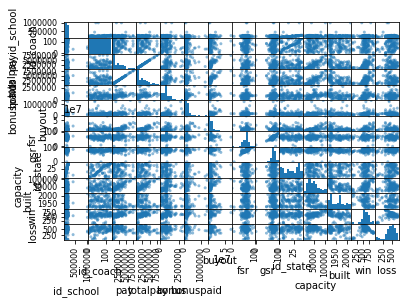

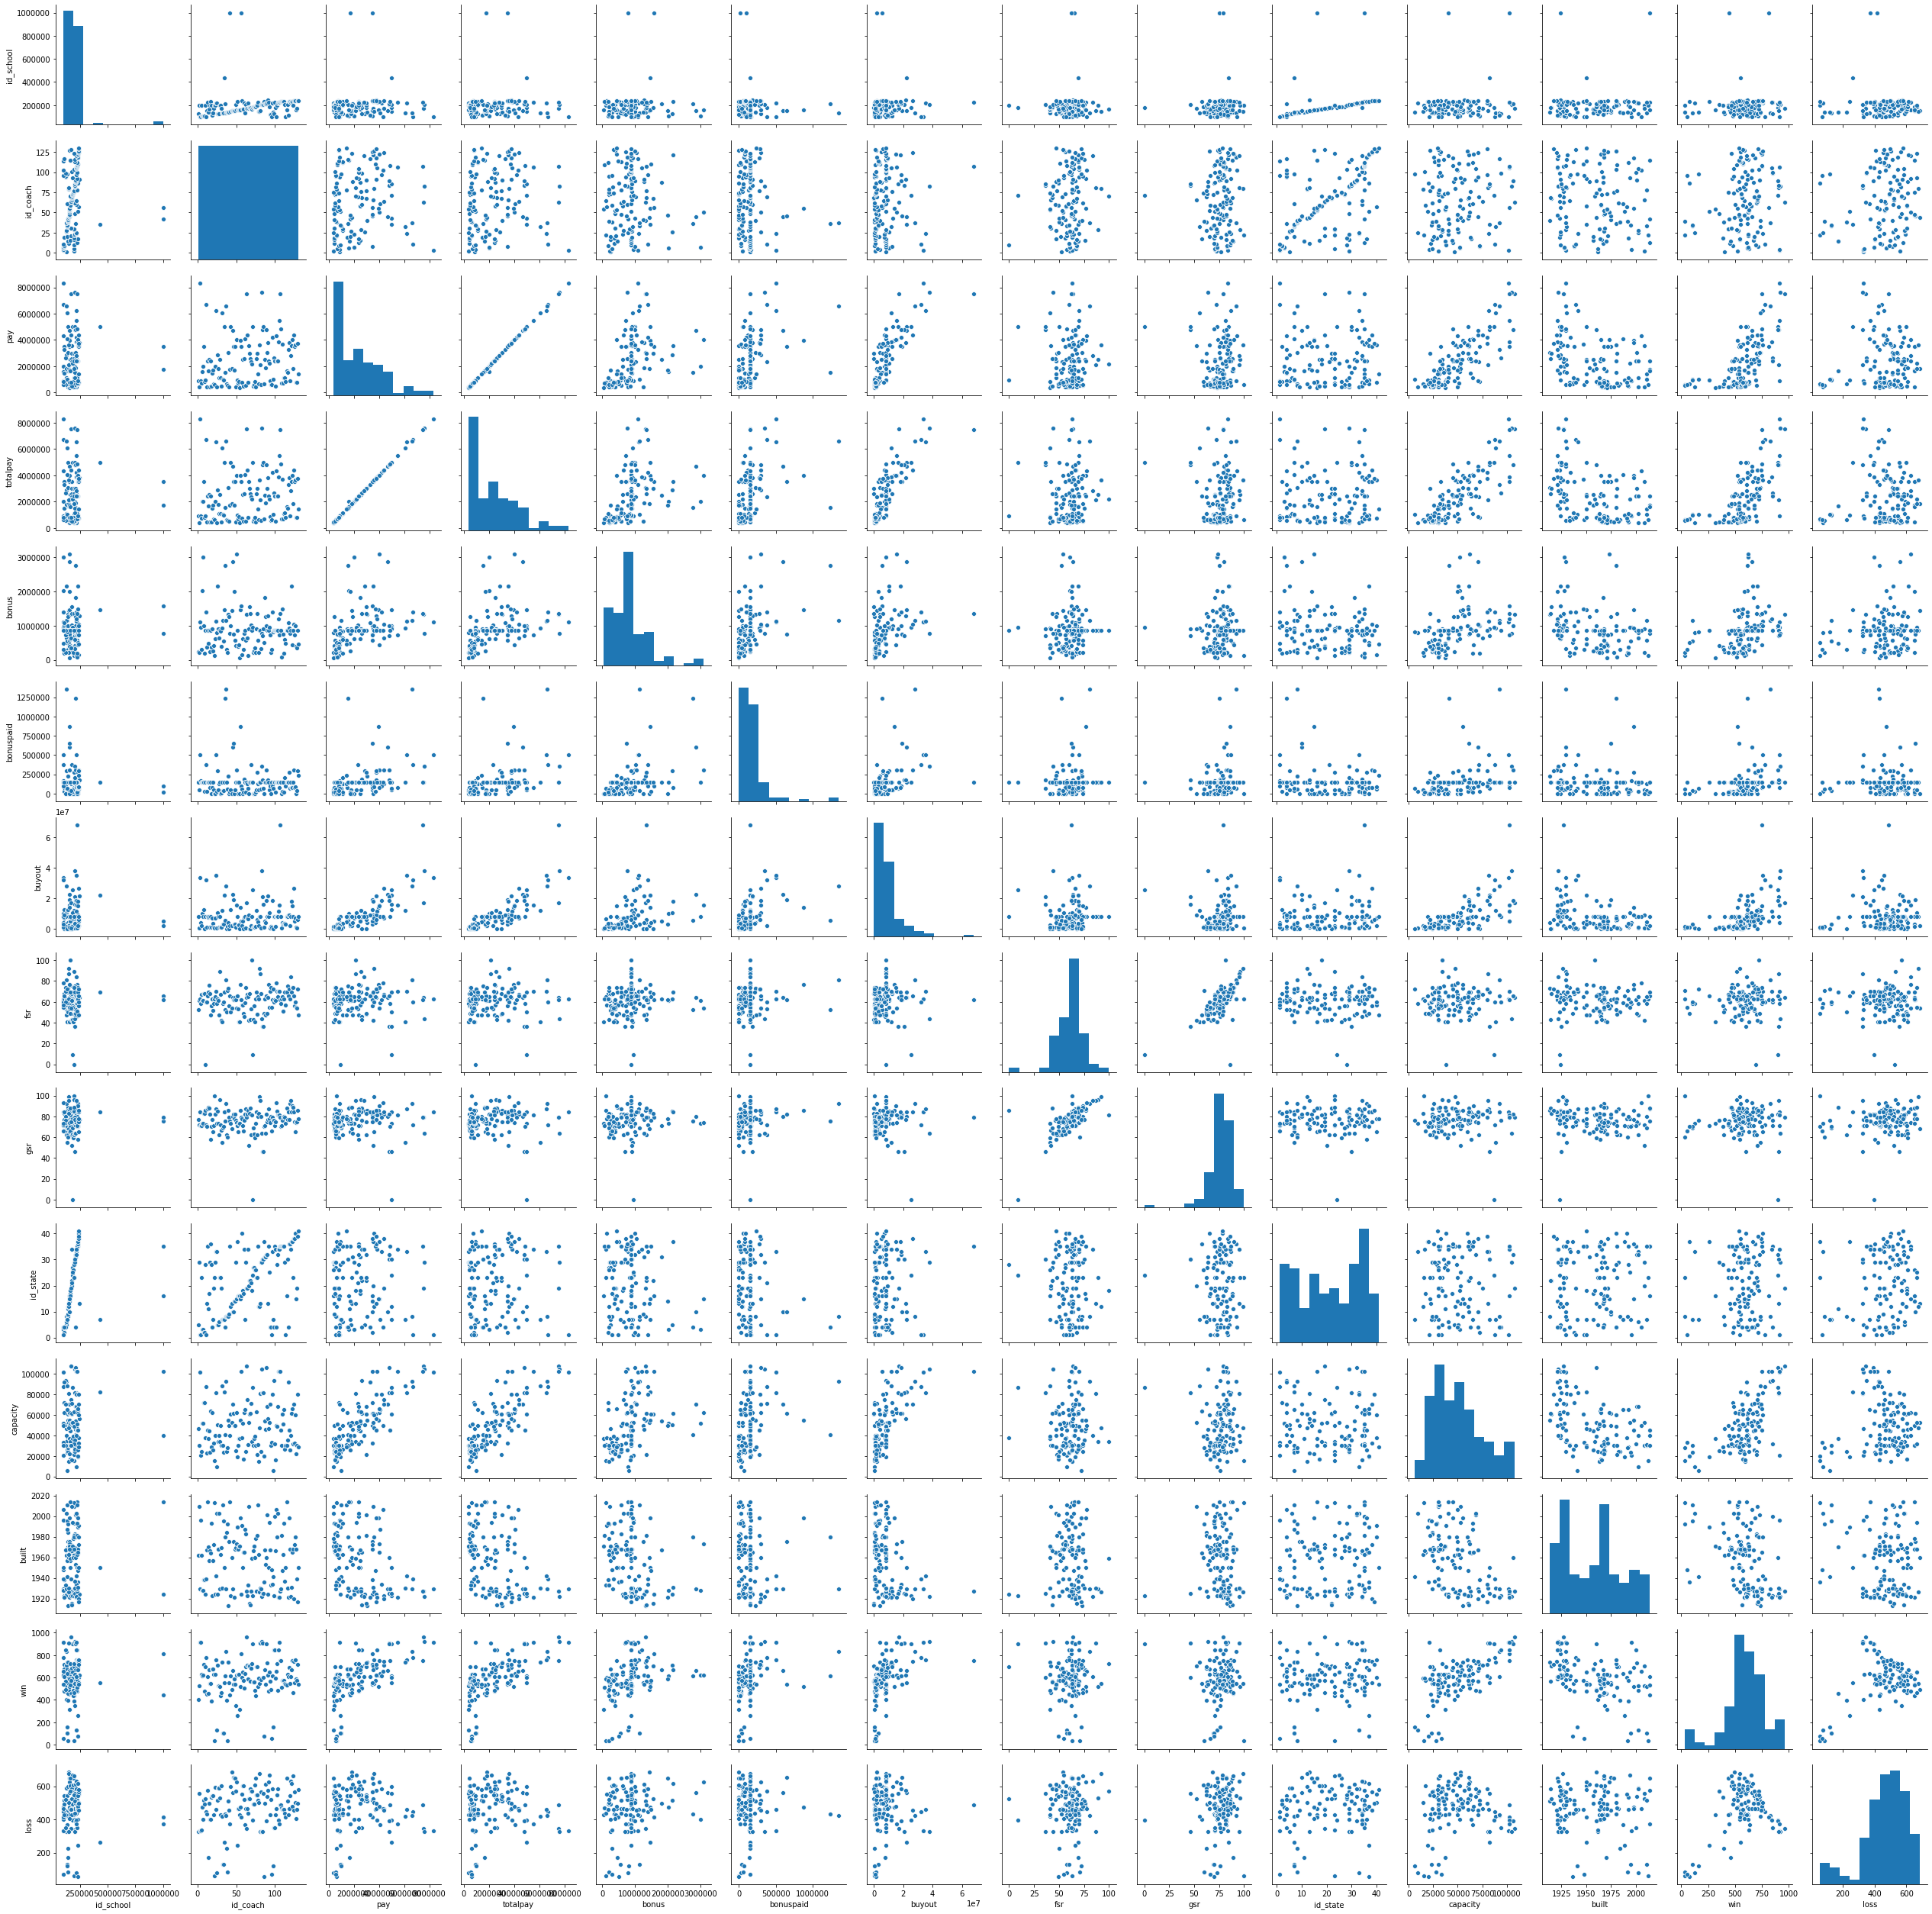

In [11]:
"""--------------------------------------------------------------------------
-----------------------EXPLORE---------scatterplot--------------------------
--------------------------------------------------------------------------"""
"scatter plot to see if variable transformation needed"""
my_vars = mydata.loc[:, [ 'id_school', 'id_coach', \
        'pay', 'totalpay','bonus','bonuspaid','buyout',\
        'fsr','gsr' ,'stadium', \
        'id_state','capacity','built', 'win','loss']]
scatter_matrix(my_vars)
#Seaborn view for improved visualization
fig = sns.pairplot(my_vars)
mygrid = mygrid.map_upper(sns.regplot)
mygrid = mygrid.map_lower(sns.kdeplot)
mygrid = mygrid.map_diag(sns.distplot, rug=True)
print("ScatterPlot Analysis does not indicate heterscedascity for:")
print("gsr, fsr, wins and losses so they were transformed with lognormal.")
plt.show

C:\Users\17574\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


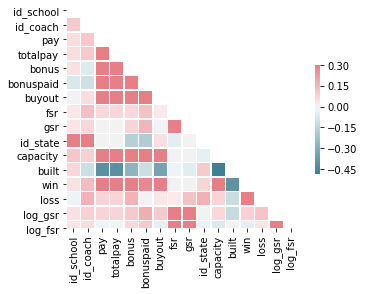

In [12]:
#VARIABLE TRANSFORMATION for variables with questionable spread
mydata = mydata.fillna(mydata.mean())
mydata['log_gsr'] = np.log(mydata['gsr'])
mydata['log_fsr'] = np.log(mydata['fsr'])
my_vars['log_gsr'] = np.log(mydata['gsr'])
my_vars['log_fsr'] = np.log(mydata['fsr']) #addiong for one more visual
"""------------------HEAT MAP VIEW -------------------------"""
# Draw the heatmap with the mask and correct aspect ratio
corr = my_vars.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

although not a pretty graph with totalpay bunched together it does       further indicate capcity and pay having an interesting relationship


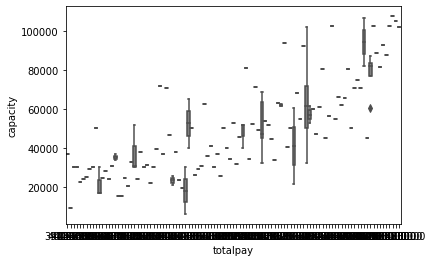

In [13]:
"""--------------------------------------------------------------------------
-------          BOXPLOT EXPLORE BASED ON CORRELATIONS------------------------
--------------------------------------------------------------------------"""
sns.boxplot(x="totalpay", y="capacity", data=mydata, color = "gray");
print("although not a pretty graph with totalpay bunched together it does \
      further indicate capcity and pay having an interesting relationship")
plt.show()

focusing on outlier removal for key predictor variables: buyout, capacity, and wins


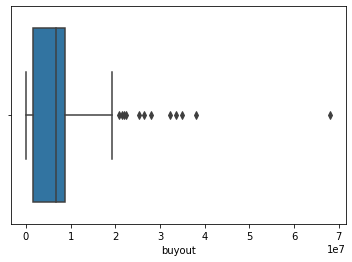

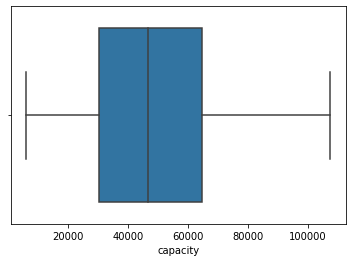

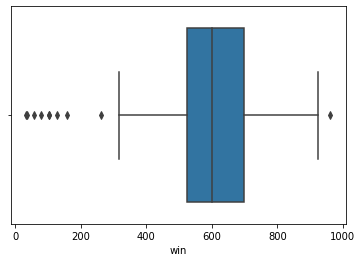

remove stadium as an object and cant perform math operation on


In [29]:
"""--------------------------------------------------------------------------
-------------EXPLORE - OUTLIER REMOVAL--------------------------------------
--------------------------------------------------------------------------"""
print("focusing on outlier removal for key predictor variables: buyout, capacity, and wins")
sns.boxplot(x="buyout", data=my_vars);
plt.show()
sns.boxplot(x="capacity", data=my_vars);
plt.show()
sns.boxplot(x="win", data=my_vars);
plt.show()
print("remove stadium as an object and cant perform math operation on")

went from 130 data points down to:  id_school    83
id_coach     83
pay          83
totalpay     83
bonus        83
bonuspaid    83
buyout       83
fsr          83
gsr          83
id_state     83
capacity     83
built        83
win          83
loss         83
lat          83
long         83
dtype: int64


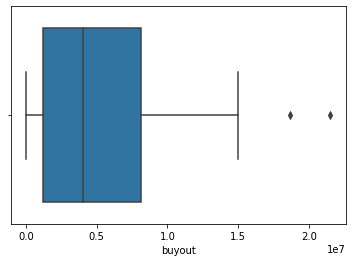

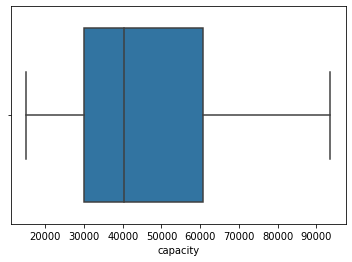

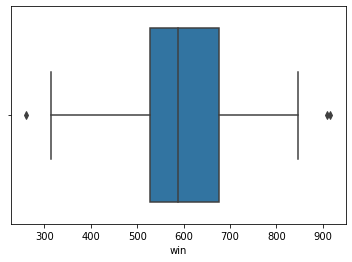

In [30]:
#removal of outliers less than 2 standard deviations
my_vars = mydata.loc[:, [ 'id_school', 'id_coach', \
        'pay', 'totalpay','bonus','bonuspaid','buyout',\
        'fsr','gsr' , \
        'id_state','capacity','built', 'win','loss','lat','long']]
from scipy import stats
my_vars2=my_vars[(np.abs(stats.zscore(my_vars)) <= 2).all(axis=1)]
print("went from 130 data points down to: ",my_vars2.count())
    #my_vars[np.abs(my_vars.Data-my_vars.Data.mean()) <= (3*my_vars.Data.std())]
    ## keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
sns.boxplot(x="buyout", data=my_vars2);
plt.show()
sns.boxplot(x="capacity", data=my_vars2);
plt.show()
sns.boxplot(x="win", data=my_vars2);
plt.show()

In [24]:
"""Following sequence of models were developed"""
#removal of none-signifcants first pass - id_state + year built
#model_2 = smf.ols('totalpay ~ id_coach + bonus +bonuspaid + buyout + \
#   gsr + fsr + capacity + win + loss', data=my_vars).fit()
#print(model_2.summary())
##removal of bonus and bonus paid
#model_3 = smf.ols('totalpay ~ id_coach + buyout + \
#   gsr + fsr + capacity + win + loss', data=my_vars).fit()
#print(model_3.summary())
#removal id_coach + 
#model_4 = smf.ols('totalpay ~  buyout + \
#   gsr + fsr + capacity + win + loss', data=my_vars).fit()
#print(model_4.summary())
#model_5 = smf.ols('totalpay ~ buyout + gsr + fsr + capacity + win + loss', data=my_vars).fit()
#print(model_5.summary())
#print("Final Model")
model_6 = smf.ols('totalpay ~ buyout + capacity + win', data=my_vars).fit()
print(model_6.summary())

                            OLS Regression Results                            
Dep. Variable:               totalpay   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     53.68
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           5.08e-19
Time:                        23:29:40   Log-Likelihood:                -1242.0
No. Observations:                  83   AIC:                             2492.
Df Residuals:                      79   BIC:                             2502.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.267e+06   4.38e+05     -2.895      0.0

In [23]:
"""--------------------------------------------------------------------------
---------------------------------MODEL-INLCUDING OUTLIERS--------------------------
--------------------------------------------------------------------------"""
from sklearn import linear_model
lr = linear_model.LinearRegression()

model_1 = smf.ols('totalpay ~ id_coach + bonus + buyout + \
   fsr + gsr + capacity + built + win + loss', data=my_vars).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:               totalpay   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     21.17
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           4.64e-17
Time:                        23:29:28   Log-Likelihood:                -1234.8
No. Observations:                  83   AIC:                             2490.
Df Residuals:                      73   BIC:                             2514.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.368e+06   6.81e+06      0.201      0.8

In [31]:
"""--------------------------------------------------------------------------
---------------------------------MODEL-exLCUDING OUTLIERS--------------------------
--------------------------------------------------------------------------"""
print("final model after insignificant values removed")
#model_1 = smf.ols('totalpay ~ id_coach + bonus +bonuspaid + buyout + id_state+ \
#   gsr + fsr + capacity + built + win + loss', data=my_vars2).fit()
#print(model_1.summary())
##1st pass removal: id_state+fsr+built+id_coach
#model_2 = smf.ols('totalpay ~ bonus +bonuspaid + buyout + \
#   gsr + capacity + win + loss', data=my_vars2).fit()
#print(model_2.summary())
##1st pass removal: loss + bonuspaid
#model_3 = smf.ols('totalpay ~ bonus + buyout +gsr + capacity + win', data=my_vars2).fit()
#print(model_3.summary())
model_4 = smf.ols('totalpay ~ bonus + buyout + capacity + win', data=my_vars2).fit()
print(model_4.summary())

final model after insignificant values removed
                            OLS Regression Results                            
Dep. Variable:               totalpay   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     47.79
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           3.02e-20
Time:                        23:43:43   Log-Likelihood:                -1236.7
No. Observations:                  83   AIC:                             2483.
Df Residuals:                      78   BIC:                             2495.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Inter

In [32]:
print("can't include buyout field if then predicting salary for Big Ten, etc")
model_5 = smf.ols('totalpay ~ bonus + capacity + win', data=my_vars2).fit()
print(model_5.summary())

can't include buyout field if then predicting salary for Big Ten, etc
                            OLS Regression Results                            
Dep. Variable:               totalpay   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     38.90
Date:                Tue, 28 Jan 2020   Prob (F-statistic):           1.53e-15
Time:                        00:06:25   Log-Likelihood:                -1250.4
No. Observations:                  83   AIC:                             2509.
Df Residuals:                      79   BIC:                             2519.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

sorry professor - ran out of time to figure out how to import US map + state boundaries in Python but had lat/long values
would have also included pay or predicted pay probably by conference type by color


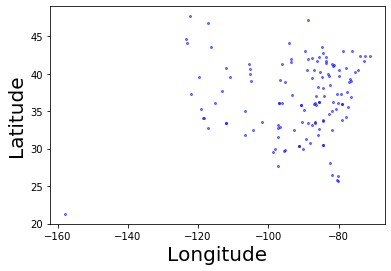

In [36]:
"""--------------------------------------------------------------------------
---------------------------------graph visual---------------incomplete  >:o(
--------------------------------------------------------------------------"""
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
print("sorry professor - ran out of time to figure out how to import US map + state boundaries in Python but had lat/long values")
print("would have also included pay or predicted pay probably by conference type by color")
my_lat_long = mydata.loc[:, [ 'id_school', 'id_conference', \
        'pay', 'totalpay','bonus','bonuspaid','buyout',\
        'id_state','capacity', 'win','loss','lat','long']]
plt.scatter(my_lat_long.long,my_lat_long.lat, alpha=0.5, s=4, color="blue")
plt.xlabel('Longitude', size=20)
plt.ylabel('Latitude', size=20)
plt.show()

In [39]:
"""--------------------------------------------------------------------------
---------------------------TRAIN AND TEST---------------------------------
--------------------------------------------------------------------------"""
np.random.seed(4444)
my_vars2['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(my_vars2))
my_vars2_train = my_vars2[my_vars2['runiform'] >= 0.33]
my_vars2_test = my_vars2[my_vars2['runiform'] < 0.33]

tree_model_maker = DecisionTreeRegressor(random_state = 9999, max_depth = 5)
y_train = my_vars2_train.loc[:, ['totalpay']]

# simple model has six predictors
X_train_simple = my_vars2_train.loc[:,['bonus', 'capacity', 'win']]
X_test_simple = my_vars2_test.loc[:,['bonus', 'capacity', 'win']]
tree_model_fit = tree_model_maker.fit(X_train_simple, y_train)

print("PROFESSOR - THIS IS A VERY SUSPICIOUS RESULT AND SORRY OUT OF TIME TO DIG DEEPER, COMPARE RANDOM FOREST, ETC")
print("PROFESSOR - THIS IS A VERY SUSPICIOUS RESULT AND SORRY OUT OF TIME TO DIG DEEPER, COMPARE RANDOM FOREST, ETC")
print("PROFESSOR - THIS IS A VERY SUSPICIOUS RESULT AND SORRY OUT OF TIME TO DIG DEEPER, COMPARE RANDOM FOREST, ETC")

# compute the proportion of response variance for training data
my_vars2_train['simple_tree_predict_log_value'] =tree_model_fit.predict(X_train_simple)
simple_tree_train_result = round(np.power(my_vars2_train['totalpay'].corr(my_vars2_train['simple_tree_predict_log_value']),2),3)
print('\nSimple Tree Prop. of Training Set Variance Accounted for: ',simple_tree_train_result)

# compute the proportion of response variance for test data
my_vars2_test['simple_tree_predict_log_value'] =tree_model_fit.predict(X_test_simple)
simple_tree_test_result = round(np.power(my_vars2_test['totalpay'].corr(my_vars2_test['simple_tree_predict_log_value']),2),3)
print('\nSimple Tree Prop. of Test Set Variance Accounted for: ',simple_tree_test_result)

PROFESSOR - THIS IS A VERY SUSPICIOUS RESULT AND SORRY OUT OF TIME TO DIG DEEPER, COMPARE RANDOM FOREST, ETC
PROFESSOR - THIS IS A VERY SUSPICIOUS RESULT AND SORRY OUT OF TIME TO DIG DEEPER, COMPARE RANDOM FOREST, ETC
PROFESSOR - THIS IS A VERY SUSPICIOUS RESULT AND SORRY OUT OF TIME TO DIG DEEPER, COMPARE RANDOM FOREST, ETC

Simple Tree Prop. of Training Set Variance Accounted for:  0.976

Simple Tree Prop. of Test Set Variance Accounted for:  0.263


C:\Users\17574\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\17574\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\17574\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa